In [2]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP
import numpy as np

load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\ortools.dll...


ImportError: cannot import name 'info' from 'optiwindnet' (C:\code\OptiWindNet\optiwindnet\__init__.py)

In [ ]:
# data
cables = [(None, 3, 206), (None, 5, 287), (None, 7, 406)]

substations = np.array([[696, 1063],], dtype=float)
turbines = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float
)
border = np.array( # vertices oriented counter-clockwise
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)
# 'obstacles' is an optional location attribute
obstacles = [
    # - vertices oriented clockwise for each obstacle polygon
    # - obstacles must be strictly inside the extents polygon
    # - undefined behavior if obstacles and extents borders overlap
    # first obstacle
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
    # [second obstacle] ...
]

NameError: name 'np' is not defined

In [ ]:
# initialize the Heuristic router
router = Heuristic(solver='EW') # default is EW

In [ ]:
# create wfn from coordinates
wfn = WindFarmNetwork(turbines=turbines, substations=substations, border=border, obstacles=obstacles, cables=cables,router=router)
#wfn.plot_L()
#wfn.plot_A()


[11 -1 -1 -1  3  3  0  2  8  8  9  6]
('src', 'tgt', 'length', 'load', 'reverse', 'cable', 'cost')


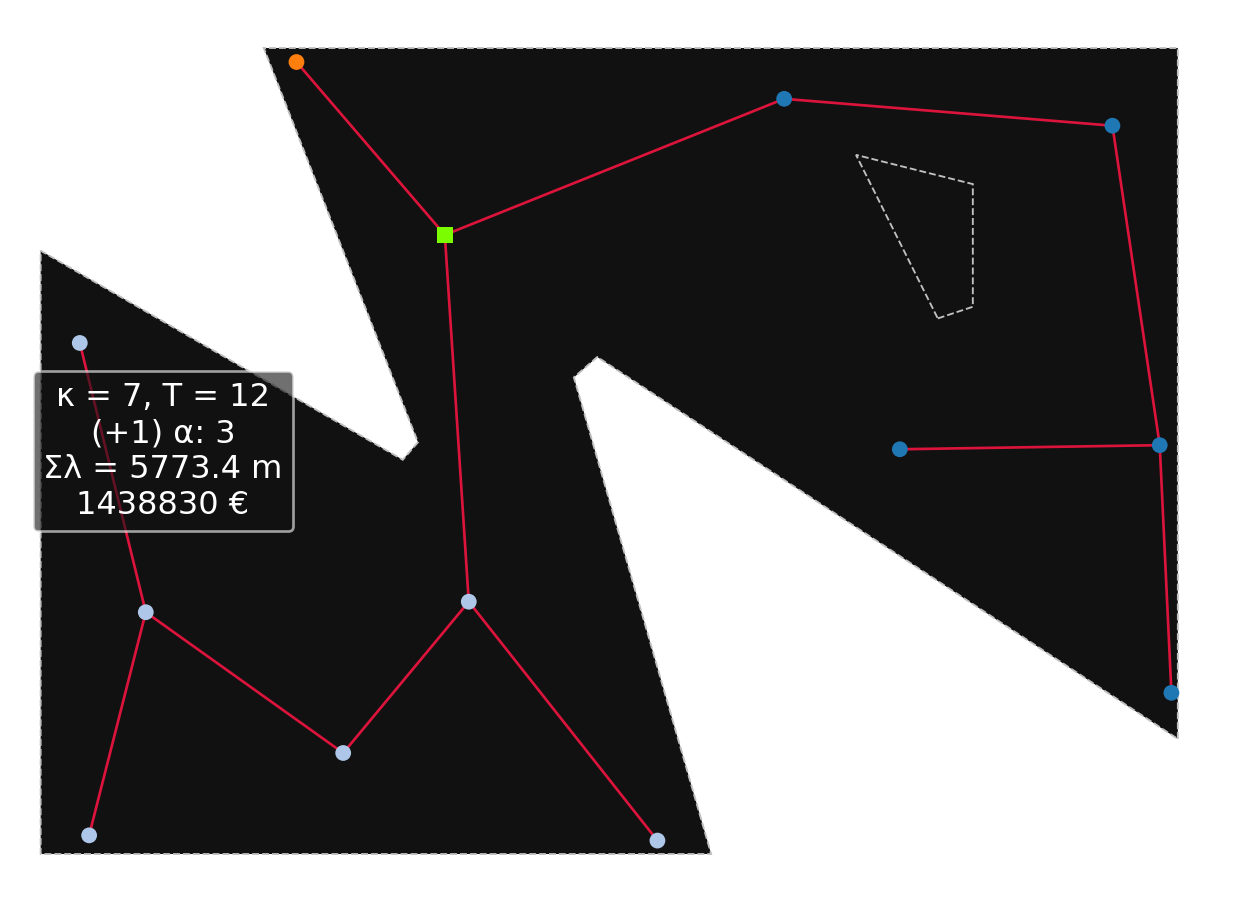

In [ ]:
# Run optimization
edges_array = wfn.optimize()
# print('from_nodes:', from_nodes)
# print('to_nodes:', to_nodes)
# print('lengths:', lengths)
# print('loads:', loads)
# print('reverses:', reverses)
# print('cable_types:', cable_types)
# print('costs:', costs)
# router should return array tree
#wfn.plot_L()
#wfn.plot_A()
#wfn.plot_G_tentative()
wfn.plot()
print(edges_array['src'])
type(edges_array)
print(edges_array.dtype.names)


In [ ]:
wfn.gradient()

[(11, 10, {'length': 474.6472374300729, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 97777.33091059502}), (-1, 4, {'length': 625.9792328823696, 'load': 5, 'reverse': False, 'cable': 1, 'cost': 179656.03983724007}), (-1, 6, {'length': 629.3369526732083, 'load': 6, 'reverse': False, 'cable': 2, 'cost': 255510.80278532256}), (-1, 5, {'length': 390.041023483428, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 80348.45083758616}), (3, 4, {'length': 563.8794197343967, 'load': 4, 'reverse': True, 'cable': 1, 'cost': 161833.39346377185}), (3, 1, {'length': 552.9647366695276, 'load': 3, 'reverse': True, 'cable': 0, 'cost': 113910.7357539227}), (0, 1, {'length': 424.471436023674, 'load': 1, 'reverse': True, 'cable': 0, 'cost': 87441.11582087685}), (2, 1, {'length': 445.05505277437305, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 91681.34087152085}), (8, 10, {'length': 415.12046444375636, 'load': 3, 'reverse': False, 'cable': 0, 'cost': 85514.8156754138}), (8, 6, {'length': 336.609566114

(array([[   9.70618904, -205.77120764],
        [   0.        ,    0.        ],
        [-205.97451805,   -3.2400486 ],
        [ 255.86790133,  180.36510604],
        [   0.        ,    0.        ],
        [   0.        ,    0.        ],
        [-127.67235372,  161.66561198],
        [   0.        ,    0.        ],
        [ -15.58364377, -340.42274323],
        [ -50.69989847, -199.66351769],
        [   0.        ,    0.        ],
        [ -49.04273777,  200.07700985]]),
 array([[-158.6779147 ,  141.97899934]]))

In [ ]:
new_substations = np.array([[600, 500],], dtype=float)
from_nodes, to_nodes, lengths, loads, reverses, cable_types, costs = wfn.optimize(substations=new_substations)
print('from_nodes:', from_nodes)
print('to_nodes:', to_nodes)
print('lengths:', lengths)
print('loads:', loads)
print('reverses:', reverses)
print('cable_types:', cable_types)
print('costs:', costs)
wfn.plot()

ValueError: too many values to unpack (expected 7)

<Axes: >

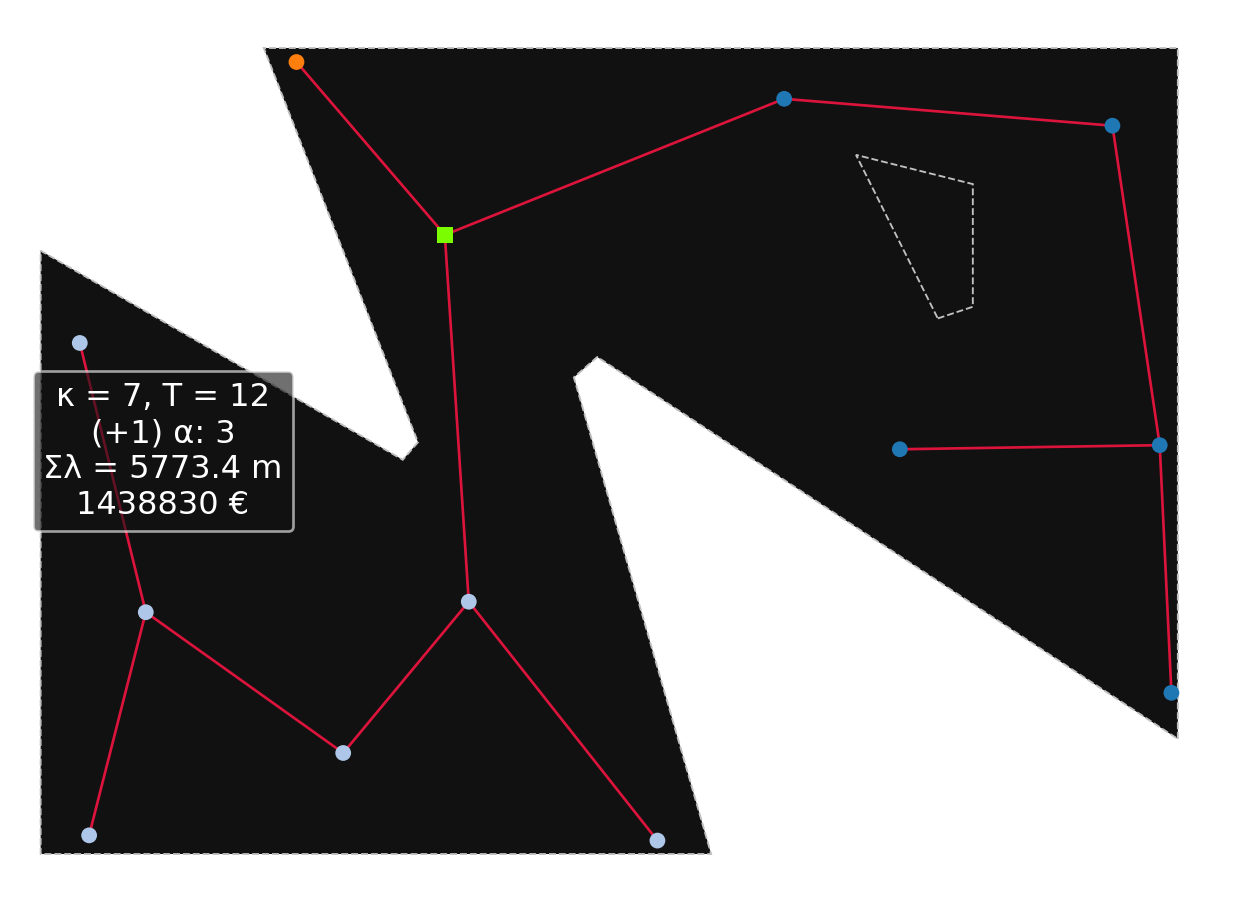

In [ ]:
wfn3 = WindFarmNetwork.from_yaml(filepath="C:/code/OptiWindNet/docs/notebooks/data/example_location.yaml", cables=cables, router=router)
from_nodes, to_nodes, lengths, loads, reverses, cable_types, costs = wfn3.optimize()
wfn3.plot()

<Axes: >

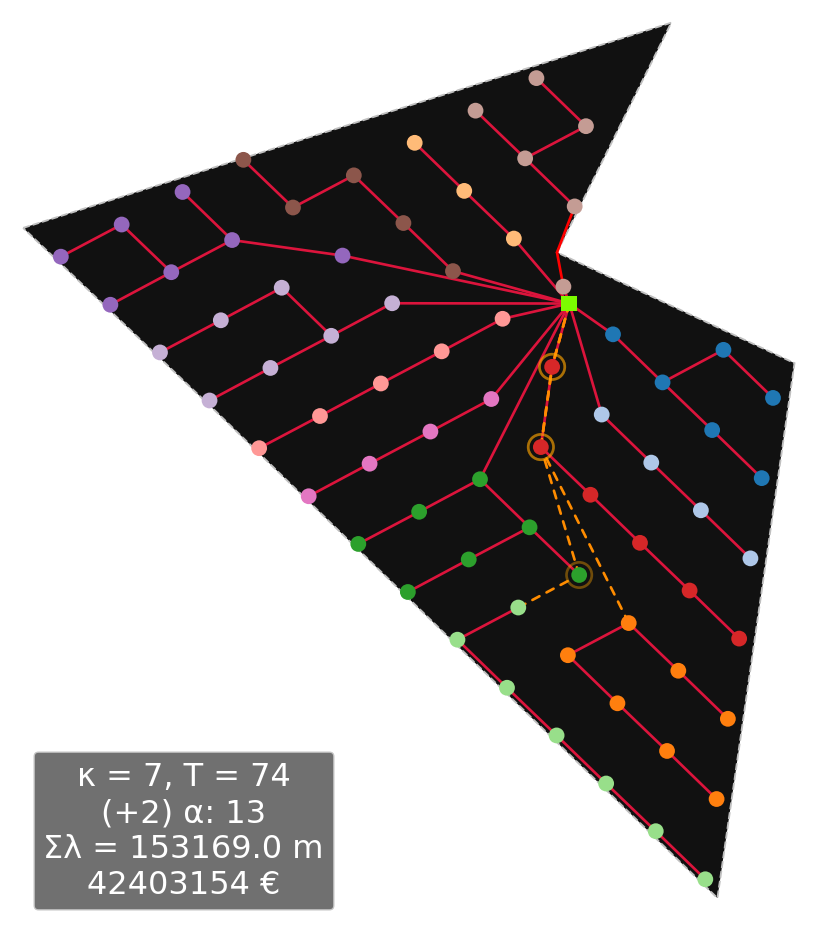

In [ ]:
wfn4 = WindFarmNetwork.from_windIO(filepath="C:/code/OptiWindNet/docs/notebooks/data/IEA37_Borssele_Regular_System.yaml", cables=cables, router=router)
wfn4.optimize()
wfn4.plot()